In [7]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
%matplotlib inline
%load_ext autoreload
%autoreload 2

import mltools.dtree_z as dt    # import decision tree code

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
Xt = np.genfromtxt("data/kaggle.X1.train.txt",delimiter=',') #X1 train
Yt = np.genfromtxt("data/kaggle.Y.train.txt", delimiter=',') #Y train
Xtest = np.genfromtxt("data/kaggle.X1.test.txt", delimiter=',')
print("hwy")

hwy


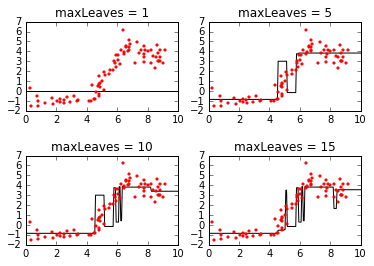

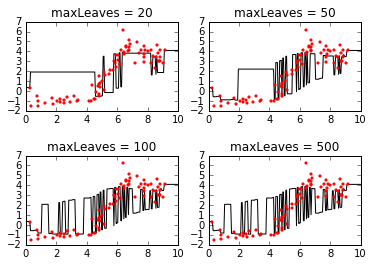

In [42]:
# test = np.genfromtxt('data/iris.txt')
# print(test.shape)
# X = test[:, :-1]
# Y = test[:, -1]

data = np.genfromtxt('data/curve80.txt')
X = data[:, :-1]
Y = data[:,-1:]
Xs = np.linspace(0,10,200)[:,np.newaxis]
Ys_list = []

for maxLeaves in [1,5,10,15,20,50,100,500]:
    learner = dt.treeRegress()
    learner.train(X,Y,maxLeaves)
    Ys_list.append(learner.predict(Xs))

plt.figure()
f,axes =plt.subplots(2,2)
f.subplots_adjust(hspace=.5)
axes[0][0].plot(Xs,Ys_list[0],'k-',X,Y,'r.', linewidth=1,markersize=5) 
axes[0][1].plot(Xs,Ys_list[1],'k-',X,Y,'r.', linewidth=1,markersize=5)
axes[1][0].plot(Xs,Ys_list[2],'k-',X,Y,'r.', linewidth=1,markersize=5) 
axes[1][1].plot(Xs,Ys_list[3],'k-',X,Y,'r.', linewidth=1,markersize=5)
axes[0][0].set_title('maxLeaves = 1')
axes[0][1].set_title('maxLeaves = 5')
axes[1][0].set_title('maxLeaves = 10')
axes[1][1].set_title('maxLeaves = 15')
plt.show()
plt.figure()
f,axes =plt.subplots(2,2)
f.subplots_adjust(hspace=.5)
axes[0][0].plot(Xs,Ys_list[4],'k-',X,Y,'r.', linewidth=1,markersize=5) 
axes[0][1].plot(Xs,Ys_list[5],'k-',X,Y,'r.', linewidth=1,markersize=5)
axes[1][0].plot(Xs,Ys_list[6],'k-',X,Y,'r.', linewidth=1,markersize=5) 
axes[1][1].plot(Xs,Ys_list[7],'k-',X,Y,'r.', linewidth=1,markersize=5)
axes[0][0].set_title('maxLeaves = 20')
axes[0][1].set_title('maxLeaves = 50')
axes[1][0].set_title('maxLeaves = 100')
axes[1][1].set_title('maxLeaves = 500')
plt.show()


# lines = plt.plot(Xt, Yt, 'r.')
# predictions = learner.predict(Xtest)
# print(predictions)
# Ye = []
# for i in predictions:
#     Ye.append(i[0])

# fh = open('predictions.csv','w')    # open file for upload
# fh.write('ID,Prediction\n')         # output header line
# for i,yi in enumerate(Ye):
#   fh.write('{},{}\n'.format(i+1,yi)) # output each prediction
# fh.close() 

In [53]:
# Xt = np.genfromtxt("data/kaggle.X1.train.txt",delimiter=',') #X1 train
# Yt = np.genfromtxt("data/kaggle.Y.train.txt", delimiter=',') #Y train
# Xtest = np.genfromtxt("data/kaggle.X1.test.txt", delimiter=',')
Xt = Xt[0:400]
Yt = Yt[0:400]


Xtr,Xva,Ytr,Yva = ml.splitData(Xt,Yt) 

TRleaf_results = []
VAleaf_results = []
# depth_range = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# leaf_range = range(0,50)
leaf_range = [1,5,10,15,20,25,50,100]

for i in leaf_range:
    learner = dt.treeRegress()
    learner.train(Xtr,Ytr,i)
    TRleaf_results.append(learner.mse(Xtr,Ytr))
    VAleaf_results.append(learner.mse(Xva,Yva))

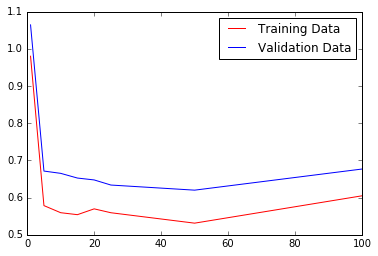

In [54]:
plt.figure()
plt.plot(leaf_range,TRleaf_results,"r-",leaf_range,VAleaf_results,"b-")
plt.legend(['Training Data','Validation Data'])
plt.show()
